In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

In [2]:
# Study data files
estimated_crimes_path = "../Resources/estimated_crimes.csv"

# Read the  data and the study results
estimated_crimes = pd.read_csv(estimated_crimes_path)

#Filter through data to get years 2006-2009
estimated_crimes_2006 = estimated_crimes[estimated_crimes['year'] >= int('2006')]
estimated_crimes_2006_09 = estimated_crimes_2006[estimated_crimes_2006['year'] <= int('2009')]

#Drop columns not being used and nan values
crime_rates_06_09 = estimated_crimes_2006_09.drop(columns = ['rape_revised', 'caveats'], axis = 1)
crime_rates_06_09 = crime_rates_06_09.dropna()

#Create a "total crime" column 
crime_rates_06_09["total_crime"]=crime_rates_06_09["violent_crime"]+ crime_rates_06_09["homicide"]+ \
crime_rates_06_09["rape_legacy"]+crime_rates_06_09["robbery"]+ crime_rates_06_09["aggravated_assault"]+ \
crime_rates_06_09["property_crime"]+crime_rates_06_09["burglary"]+crime_rates_06_09["larceny"]+ \
crime_rates_06_09["motor_vehicle_theft"]

#Create a "crime rate" column 
crime_rates_06_09["crime_rate"]=crime_rates_06_09["total_crime"]/crime_rates_06_09["population"]*100

In [3]:
#Create a df for each year
#2006
crime_rates_2006=crime_rates_06_09.loc[crime_rates_06_09["year"]==2006]
crime_rates_2006.reset_index(drop=True, inplace=True)

#2007
crime_rates_2007=crime_rates_06_09.loc[crime_rates_06_09["year"]==2007]
crime_rates_2007.reset_index(drop=True, inplace=True)

#2008
crime_rates_2008=crime_rates_06_09.loc[crime_rates_06_09["year"]==2008]
crime_rates_2008.reset_index(drop=True, inplace=True)

#2009
crime_rates_2009=crime_rates_06_09.loc[crime_rates_06_09["year"]==2009]
crime_rates_2009.reset_index(drop=True, inplace=True)

In [4]:
#Create a df for "crime rates" on each year
crimerates_allyears=pd.DataFrame({"state": crime_rates_2006["state_abbr"], 
                                 "crimerate_2006": crime_rates_2006["crime_rate"],
                                 "crimerate_2007": crime_rates_2007["crime_rate"],
                                 "crimerate_2008": crime_rates_2008["crime_rate"],
                                 "crimerate_2009": crime_rates_2009["crime_rate"]})


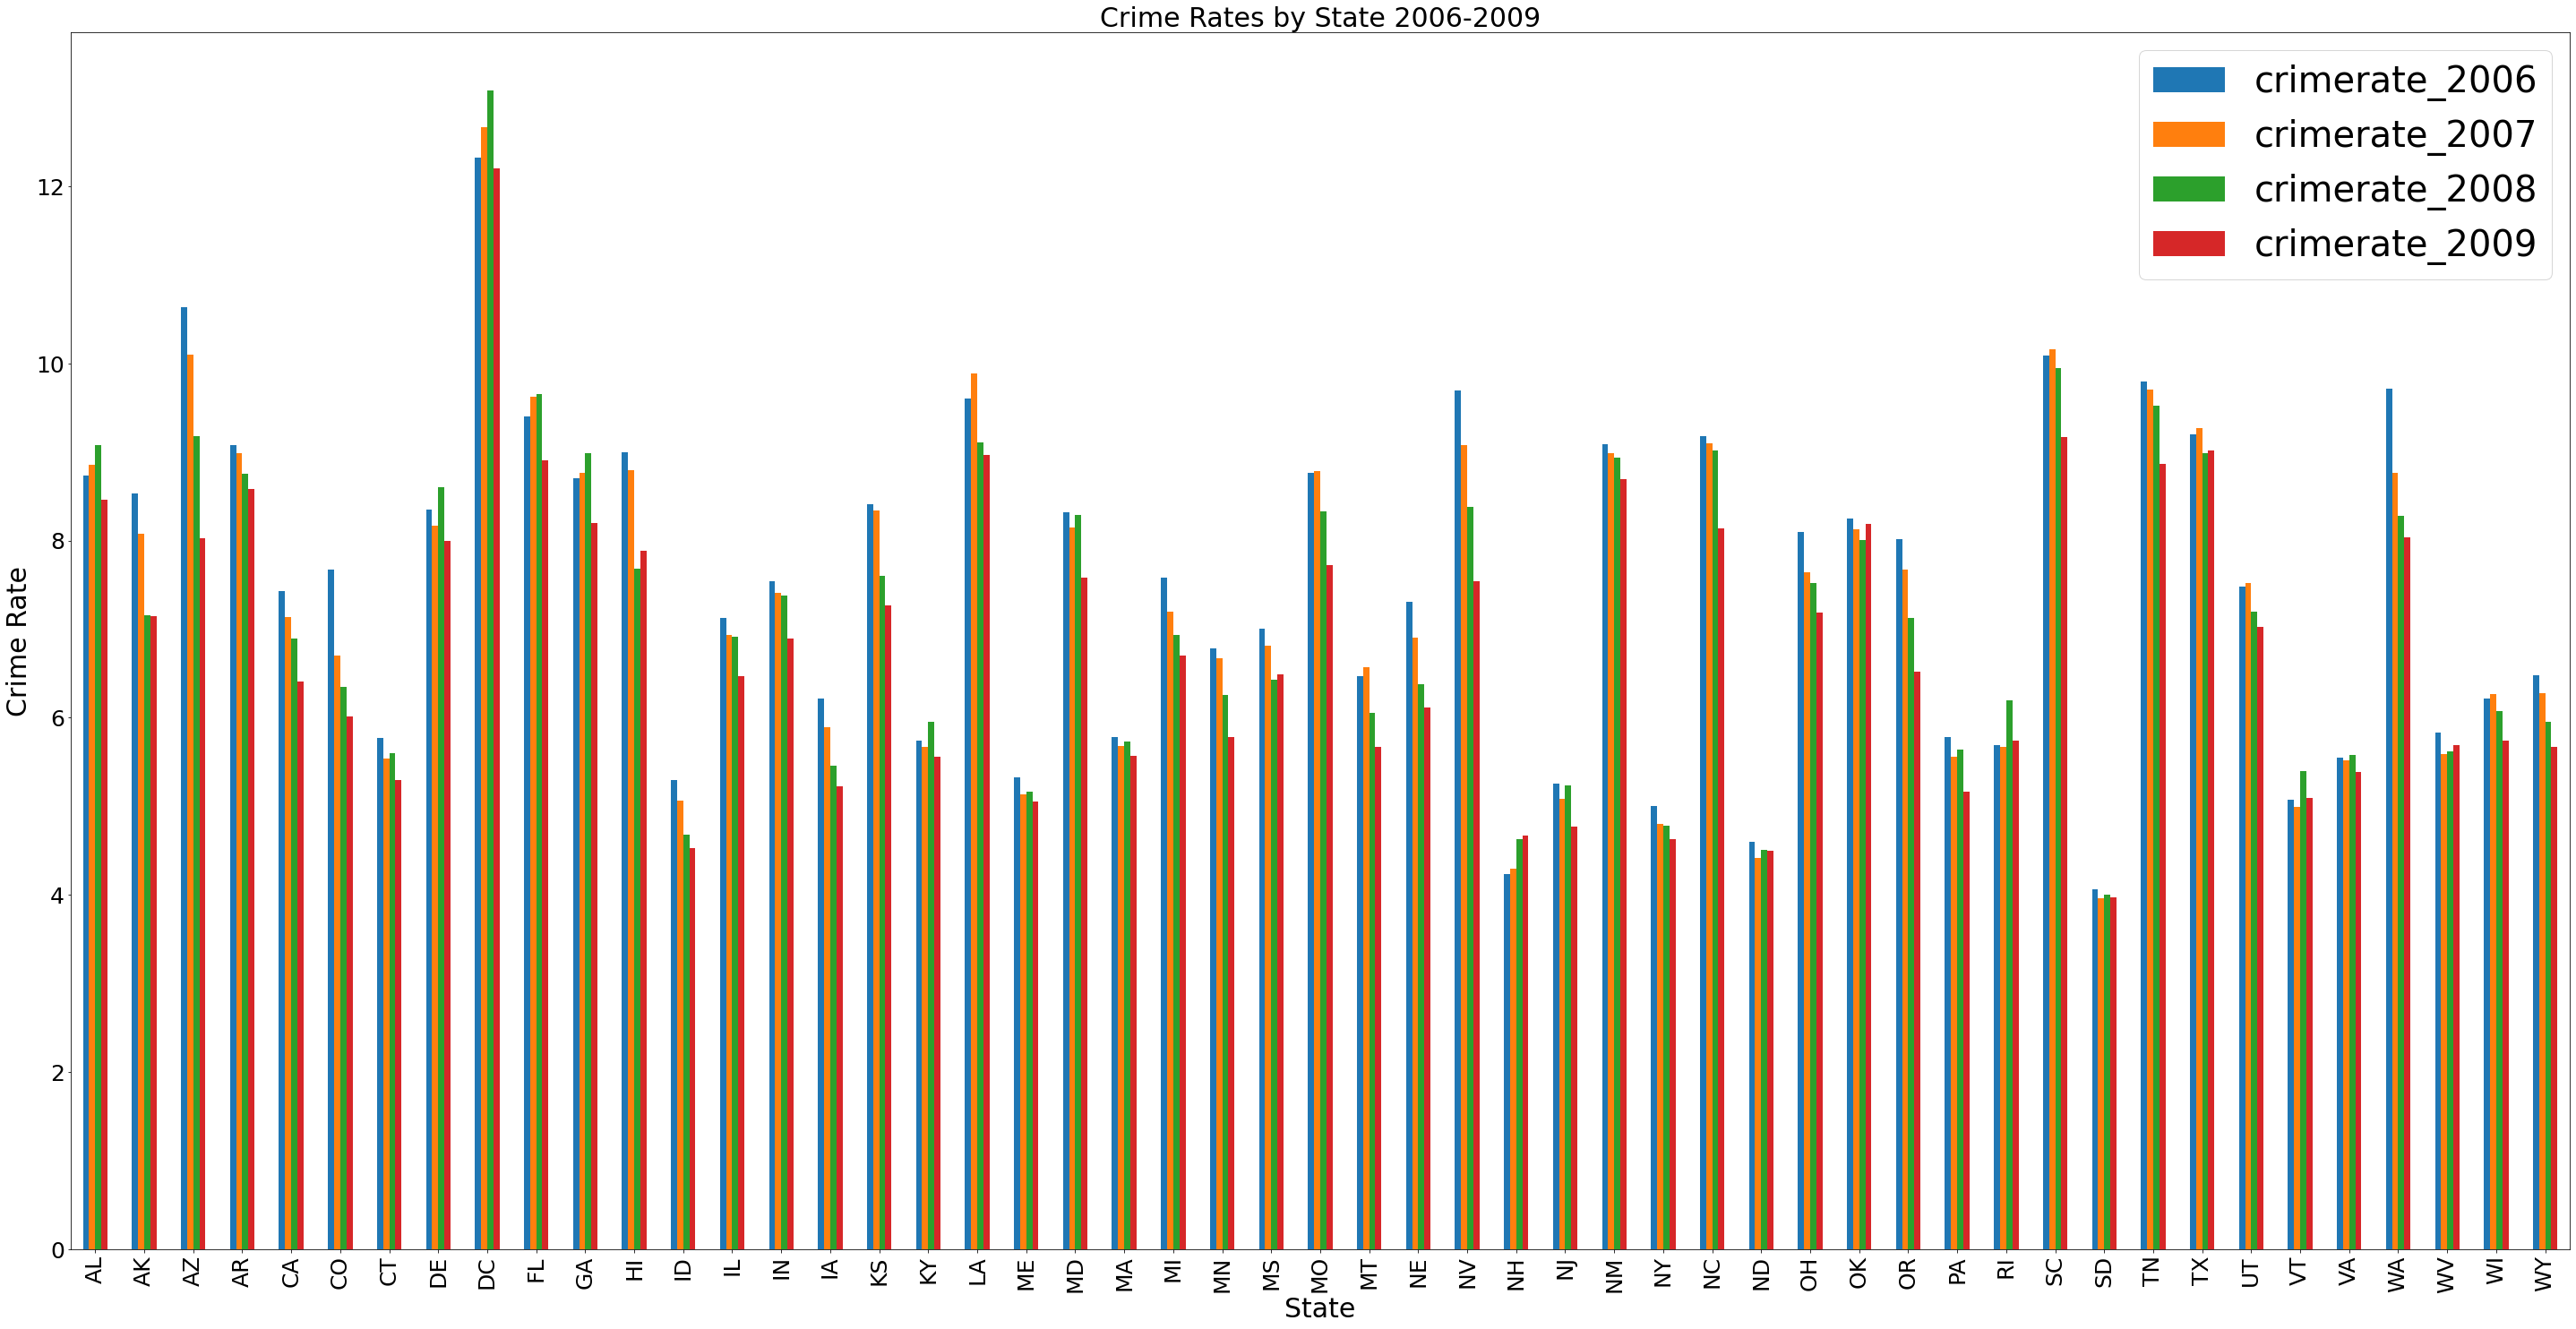

In [5]:
#Bar graph with all the crime rates for each state and year
multi_plot = crimerates_allyears.plot(kind="bar", figsize = (50, 25))
multi_plot.set_xticklabels(crimerates_allyears['state'], rotation = 90)

multi_plot.legend(fancybox=True, frameon=True, prop={'size':40})
plt.title('Crime Rates by State 2006-2009', fontsize=30)
#plt.legend("crimerate_2006")
plt.xlabel('State', fontsize=30)
plt.ylabel('Crime Rate', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(labelsize=25)
plt.savefig('../output/CrimeRatebyState2006-2009')
plt.show()

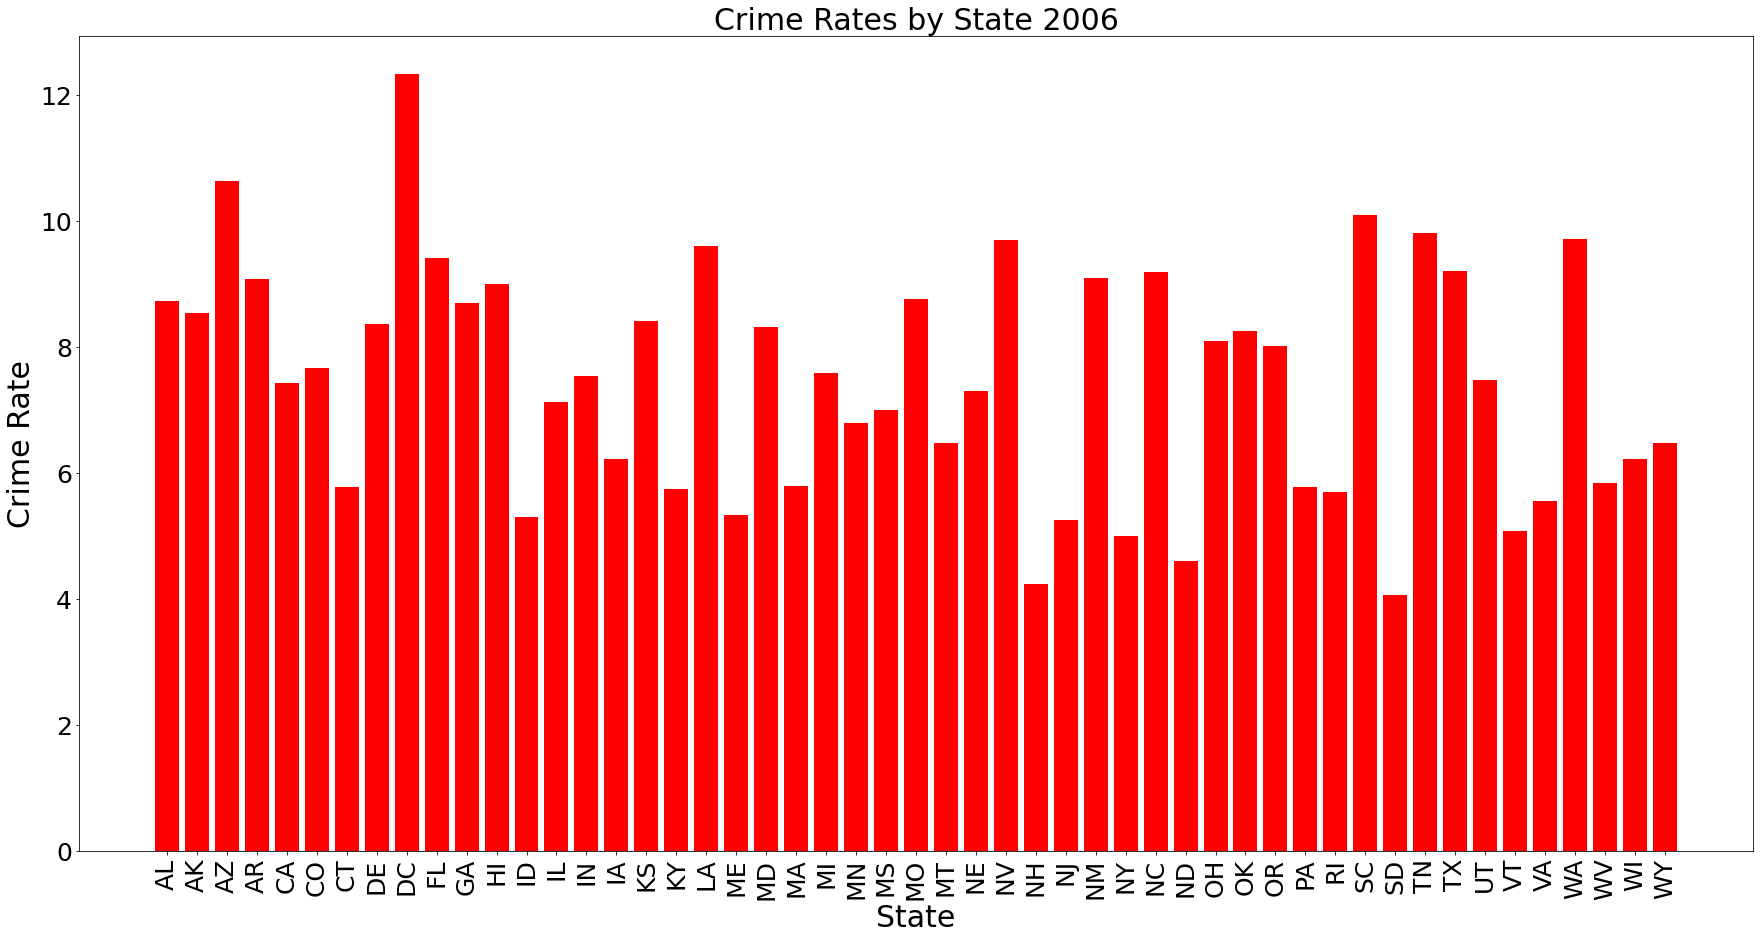

In [6]:
#Bar graph with crime rates for 2006 for each state
plt.figure(figsize=(30,15))
plt.bar(crimerates_allyears["state"], crimerates_allyears["crimerate_2006"], color="red")
plt.title('Crime Rates by State 2006', fontsize=30)
#plt.legend()
plt.xlabel('State', fontsize=30)
plt.ylabel('Crime Rate', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(labelsize=25)

#plt.tick_params(axis='x', which='major',labelsize=2)
plt.savefig('../output/CrimeRatebyState2006')
plt.show()

In [7]:
# Study data files
grad_rates_path = "../Resources/GradRates.csv"

# Read the  data and the study results
grad_rates = pd.read_csv(grad_rates_path)

#Drop columns not being used
grad_rates = grad_rates.drop(columns = ['LEAID', 'AFGEB','TOTOHC'], axis = 1)
grad_rates = grad_rates.drop(columns = ['Unnamed: 0'], axis = 1)


In [8]:
state_abbr = {1: 'AL', 2: 'AK', 60: 'AS', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA',
    66: 'GU', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA',
    26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC',
    38: 'ND', 69:'MP', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 72: 'PR', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX',
    49: 'UT', 50: 'VT', 78: 'VI', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
             }



In [9]:
#Create a column for "state_abbr"
grad_rates['state_abbr'] = grad_rates['State'].map(state_abbr)

#Dropping values that are negative and don't make sense

grad_rates = grad_rates[grad_rates['Total Dropouts'] >= 0]
grad_rates = grad_rates[grad_rates['Dropout Enroll base'] >= 0]
grad_rates = grad_rates[grad_rates['Droupout Rate'] >= 0]
grad_rates = grad_rates[grad_rates['Diploma Count'] >= 0]
grad_rates = grad_rates[grad_rates['AFGR'] >= 0]



In [10]:
#Create a df for each year and then grouping it by state

#2006
grad_rates_2006=grad_rates.loc[grad_rates["Year"]=="2006-07"]
grad_rates_2006.reset_index(drop=True, inplace=True)
grad_rates_2006_bystate = grad_rates_2006.groupby(['state_abbr']).mean()
grad_rates_2006_bystate.reset_index(inplace=True)

#2007
grad_rates_2007=grad_rates.loc[grad_rates["Year"]=="2007-08"]
grad_rates_2007.reset_index(drop=True, inplace=True)
grad_rates_2007_bystate = grad_rates_2007.groupby(['state_abbr']).mean()
grad_rates_2007_bystate.reset_index(inplace=True)

#2008
grad_rates_2008=grad_rates.loc[grad_rates["Year"]=="2008-09"]
grad_rates_2008.reset_index(drop=True, inplace=True)
grad_rates_2008_bystate = grad_rates_2008.groupby(['state_abbr']).mean()
grad_rates_2008_bystate.reset_index(inplace=True)

#2009
grad_rates_2009=grad_rates.loc[grad_rates["Year"]=="2009-10"]
grad_rates_2009.reset_index(drop=True, inplace=True)
grad_rates_2009_bystate = grad_rates_2009.groupby(['state_abbr']).mean()
grad_rates_2009_bystate.reset_index(inplace=True)


In [11]:
#Create a df with graduation rates for all years
gradrates_allyears=pd.DataFrame({"state": grad_rates_2006_bystate["state_abbr"], 
                                 "gradrate_2006": grad_rates_2006_bystate["AFGR"],
                                 "gradrate_2007": grad_rates_2007_bystate["AFGR"],
                                 "gradrate_2008": grad_rates_2008_bystate["AFGR"],
                                 "gradrate_2009": grad_rates_2009_bystate["AFGR"]})


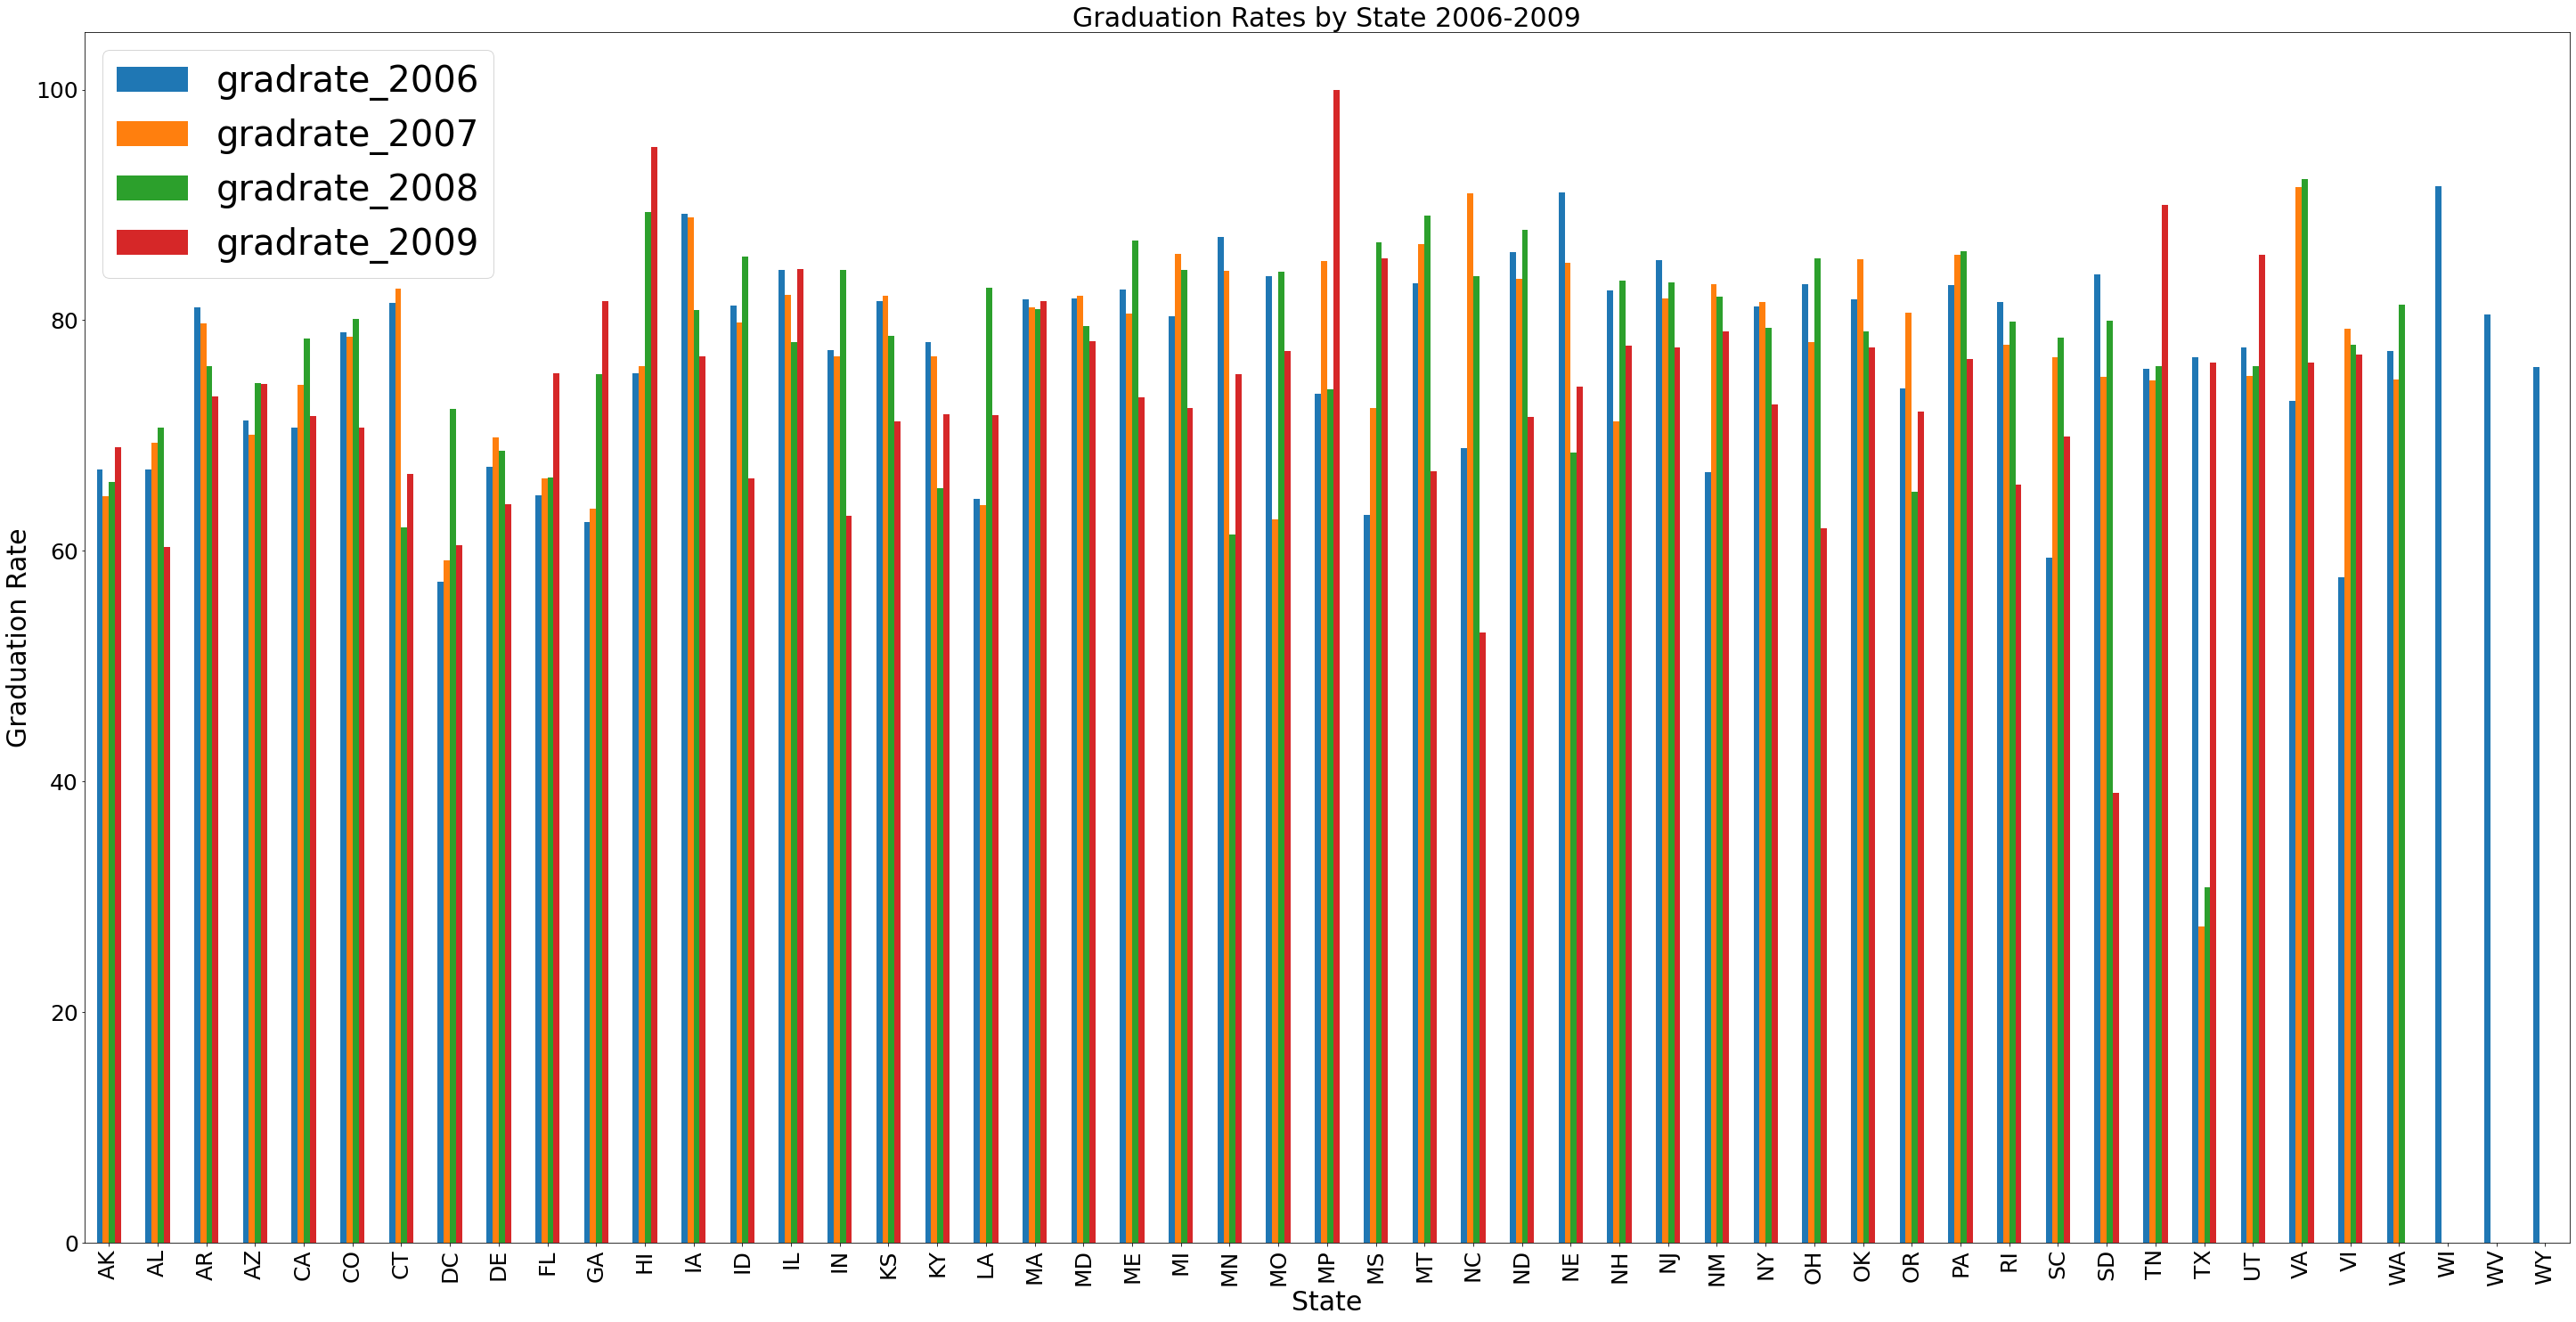

In [12]:
#Bar graph with grad rates by state by year
multi_plot_grad = gradrates_allyears.plot(kind="bar", figsize = (50, 25))
multi_plot_grad.set_xticklabels(gradrates_allyears['state'], rotation = 90)

multi_plot_grad.legend(fancybox=True, frameon=True, prop={'size':40})
plt.title('Graduation Rates by State 2006-2009', fontsize=30)
#plt.legend("crimerate_2006")
plt.xlabel('State', fontsize=30)
plt.ylabel('Graduation Rate', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(labelsize=25)
plt.savefig('../output/GradRates2006-2009')
plt.show()

In [13]:
#Selecting Crime rate Data for NY
crimerates_allyears.iloc[32]


state                  NY
crimerate_2006    4.99936
crimerate_2007    4.80457
crimerate_2008    4.78335
crimerate_2009    4.63269
Name: 32, dtype: object

In [14]:
#Selecting Grad Rates for NY
gradrates_allyears.iloc[34]

state                 NY
gradrate_2006    81.1606
gradrate_2007    81.5782
gradrate_2008    79.3413
gradrate_2009     72.725
Name: 34, dtype: object

In [15]:
#Create Data Frame for NY Grad Rates and Crime Rate
#Added (Shifted) 80 to Crime Rate data to compare slopes between Crime rates and Grad Rates. For better Visual Comparison
NY_grads_crime = {'Years': ['2006','2007', '2008', '2009'],
            'Grad Rate': [81.1606,81.5782,79.3413,72.725],
            'Crime Rate': [71.99936,71.80457,71.78335,71.63269]
        }

NY_grads_crime_df = pd.DataFrame(NY_grads_crime, columns = ['Years','Grad Rate','Crime Rate'])

NY_grads_crime_df

,Years,Grad Rate,Crime Rate
0,2006,81.1606,71.99936
1,2007,81.5782,71.80457
2,2008,79.3413,71.78335
3,2009,72.7250,71.63269


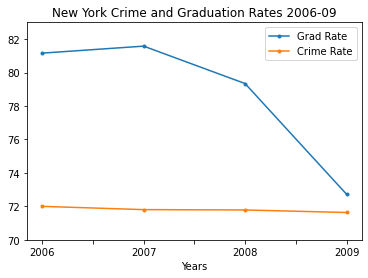

In [16]:
#Graphing NY Crime Rates and Grad Rates
NY_grads_crime_df.plot(x ='Years', y=['Grad Rate','Crime Rate'], kind = 'line', style = '.-')
plt.ylim(70,83)

#NY_grads_crime_df.plot(x ='Grad Rate', y='Crime Rate', kind = 'scatter')
plt.title('New York Crime and Graduation Rates 2006-09')
plt.savefig('../output/NY-CrimeRates')
plt.show()

In [17]:
#Selecting Crime rate Data for NJ
crimerates_allyears.iloc[30]

state                  NJ
crimerate_2006    5.25803
crimerate_2007    5.08598
crimerate_2008    5.23982
crimerate_2009    4.77426
Name: 30, dtype: object

In [18]:
#Selecting Grad Rates for NJ
gradrates_allyears.iloc[32]

state                 NJ
gradrate_2006     85.235
gradrate_2007    81.8562
gradrate_2008    83.3121
gradrate_2009    77.6725
Name: 32, dtype: object

In [19]:
#Create Data Frame for NJ Grad Rates and Crime Rate
#Added (Shifted) 80 to Crime Rate data to compare slopes between Crime rates and Grad Rates. For better Visual Comparison
NJ_grads_crime = {'Years': ['2006','2007', '2008', '2009'],
            'Grad Rate': [85.235,81.8562,83.3121,77.6725],
            'Crime Rate': [75.25803,75.08598,75.23982,74.77426]
        }

NJ_grads_crime_df = pd.DataFrame(NJ_grads_crime, columns = ['Years','Grad Rate','Crime Rate'])

NJ_grads_crime_df

,Years,Grad Rate,Crime Rate
0,2006,85.2350,75.25803
1,2007,81.8562,75.08598
2,2008,83.3121,75.23982
3,2009,77.6725,74.77426


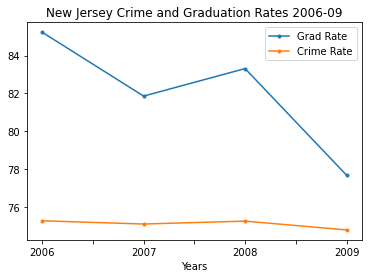

In [20]:
#Graphing NJ Crime Rates and Grad Rates
NJ_grads_crime_df.plot(x ='Years', y=['Grad Rate','Crime Rate'], kind = 'line', style = '.-')
plt.ylim()
#NJ_grads_crime_df.plot(x ='Grad Rate', y='Crime Rate', kind = 'bar')
plt.title('New Jersey Crime and Graduation Rates 2006-09')
plt.savefig('../output/NJ-CrimeRates')
plt.show()

In [21]:
#Selecting crime rate data for DC
crimerates_allyears.iloc[8]


state                  DC
crimerate_2006    12.3247
crimerate_2007    12.6628
crimerate_2008    13.0848
crimerate_2009    12.2016
Name: 8, dtype: object

In [22]:
#Selecting grad rate data for DC
gradrates_allyears.iloc[7]


state                 DC
gradrate_2006       57.3
gradrate_2007     59.175
gradrate_2008     72.319
gradrate_2009    60.4818
Name: 7, dtype: object

In [23]:
DC_grads_crime = {'Years': ['2006','2007', '2008', '2009'],
            'Grad Rate': [57.3,59.175,72.319,60.4818],
            'Crime Rate': [52.3247,52.6628,53.0848,52.2016]
        }

DC_grads_crime_df = pd.DataFrame(DC_grads_crime, columns = ['Years','Grad Rate','Crime Rate'])

DC_grads_crime_df


,Years,Grad Rate,Crime Rate
0,2006,57.3000,52.3247
1,2007,59.1750,52.6628
2,2008,72.3190,53.0848
3,2009,60.4818,52.2016


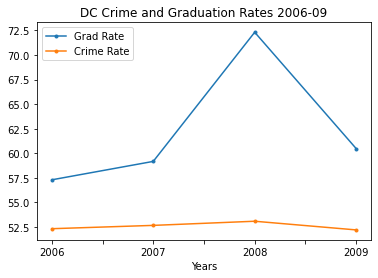

In [24]:
#Graphing DC Crime Rates and Grad Rates
DC_grads_crime_df.plot(x ='Years', y=['Grad Rate','Crime Rate'], kind = 'line', style = '.-')

#DC_grads_crime_df.plot(x ='Grad Rate', y='Crime Rate', kind = 'bar')
plt.title('DC Crime and Graduation Rates 2006-09')
plt.savefig('../output/DC-CrimeRates')
plt.show()


In [25]:
#Create a DF with average per state for GradRates
US_gradrate_avg =grad_rates.groupby(grad_rates["state_abbr"]).mean()
US_gradrate_avg.reset_index(inplace = True)


In [26]:
#Merging Grad rates and Crime rates into one df
#Merging to get rid of extra states that are not included in crime rate
CrimevsGrad = pd.merge(crime_rates_06_09, US_gradrate_avg, on= 'state_abbr', how = 'left')


In [27]:
#Add columns and calculate the crime rates for each
CrimevsGrad["robbery rate"] = (CrimevsGrad["robbery"]/CrimevsGrad['population'])*10000
CrimevsGrad["homicide rate"] = (CrimevsGrad["homicide"]/CrimevsGrad['population'])*10000
CrimevsGrad["motor_vehicle_theft rate"] = (CrimevsGrad["motor_vehicle_theft"]/CrimevsGrad['population'])*10000
CrimevsGrad["rape_legacy rate"] = (CrimevsGrad["rape_legacy"]/CrimevsGrad['population'])*10000

In [28]:

#Mean and Median of Crime Rate
crime_mean = round(CrimevsGrad['crime_rate'].astype('float').mean(), 2)
crime_median = round(CrimevsGrad['crime_rate'].astype('float').median(), 2)
print("Crime Mean: "+str(crime_mean))
print("Crime Median: "+str(crime_median))

Crime Mean: 7.18
Crime Median: 7.13


In [29]:

#Mean and Median of Graduation Rate
grad_mean = round(CrimevsGrad['AFGR'].astype('float').mean(), 2)
grad_median = round(CrimevsGrad['AFGR'].astype('float').median(), 2)
print("Graduation Mean: "+str(grad_mean))
print("Graduation Median: "+str(grad_median))

Graduation Mean: 77.32
Graduation Median: 78.35


In [30]:

#Find the Correlation between Crime Rate and Graduation Rate
correlation = CrimevsGrad.corr()
print("Correlation: "+ str(round(correlation["crime_rate"][-1],2)))

Correlation: 0.21


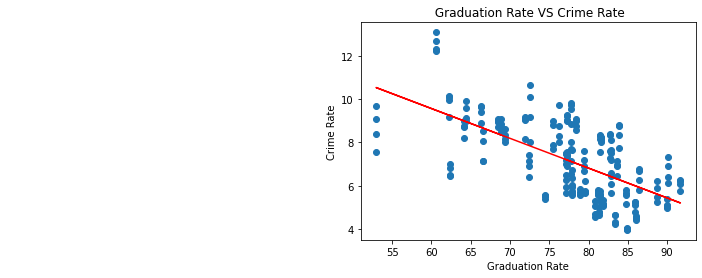

In [31]:
# Creating a Linear Regression between Crime Rates and Grad Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['crime_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Crime Rate")
plt.title(" Graduation Rate VS Crime Rate")
plt.show()


In [32]:
#Correlation
CrimevsGrad.corr()


,year,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,...,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,robbery rate,homicide rate,motor_vehicle_theft rate,rape_legacy rate
year,1.000000,0.008342,-0.022270,-0.034922,-0.020091,-0.022388,-0.021628,-0.021588,0.002734,-0.013570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.034183,-0.061529,-0.251982,-0.050085
population,0.008342,1.000000,0.967869,0.961066,0.934035,0.981837,0.940054,0.960511,0.924296,0.959190,...,-0.083251,-0.050932,-0.046731,0.235495,-0.046909,-0.050292,0.209425,0.046133,0.126800,-0.280315
violent_crime,-0.022270,0.967869,1.000000,0.977115,0.937688,0.981159,0.993405,0.968576,0.946040,0.960393,...,-0.140065,-0.004795,0.005865,0.266717,0.001818,-0.155627,0.271715,0.134759,0.211199,-0.200087
homicide,-0.034922,0.961066,0.977115,1.000000,0.922093,0.975799,0.959313,0.957503,0.934709,0.944680,...,-0.157734,-0.024773,-0.019674,0.309492,-0.022149,-0.185281,0.301251,0.209721,0.240473,-0.225942
rape_legacy,-0.020091,0.934035,0.937688,0.922093,1.000000,0.911072,0.925896,0.965590,0.955055,0.962153,...,-0.085192,-0.056271,-0.046970,0.243003,-0.051600,-0.092870,0.194703,0.065802,0.182952,-0.064963
robbery,-0.022388,0.981837,0.981159,0.975799,0.911072,1.000000,0.953379,0.950514,0.916390,0.941007,...,-0.140202,0.006145,0.011338,0.271334,0.007409,-0.121117,0.293639,0.127333,0.207062,-0.261784
aggravated_assault,-0.021628,0.940054,0.993405,0.959313,0.925896,0.953379,1.000000,0.956776,0.940471,0.949225,...,-0.141219,-0.006114,0.007710,0.259029,0.003712,-0.177100,0.258795,0.140607,0.210587,-0.170878
property_crime,-0.021588,0.960511,0.968576,0.957503,0.965590,0.950514,0.956776,1.000000,0.988519,0.995634,...,-0.089259,-0.032312,-0.020895,0.249668,-0.022024,-0.137716,0.228960,0.092000,0.207525,-0.196214
burglary,0.002734,0.924296,0.946040,0.934709,0.955055,0.916390,0.940471,0.988519,1.000000,0.980854,...,-0.098678,-0.028128,-0.014507,0.244025,-0.017762,-0.185840,0.227242,0.109950,0.201765,-0.156614
larceny,-0.013570,0.959190,0.960393,0.944680,0.962153,0.941007,0.949225,0.995634,0.980854,1.000000,...,-0.063041,-0.046511,-0.033402,0.212910,-0.032664,-0.110322,0.223330,0.079282,0.175050,-0.215077


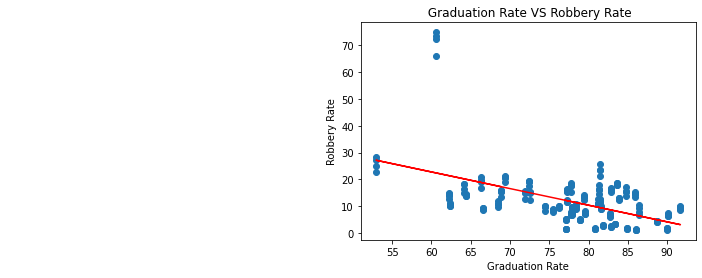

Correlation: -0.5


In [33]:

#Grad Rates vs Robbery Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['robbery rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Robbery Rate")
plt.title(" Graduation Rate VS Robbery Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-4],2)))

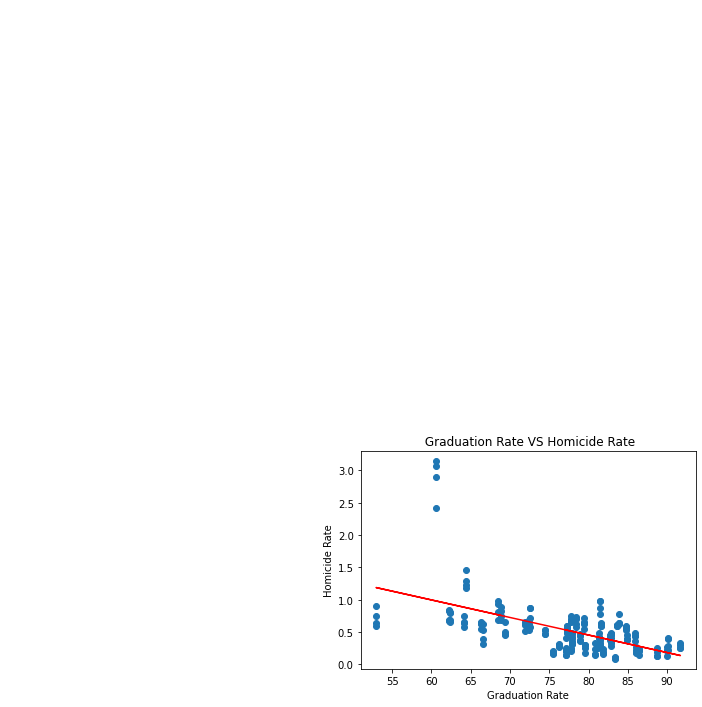

Correlation: -0.55


In [34]:
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['homicide rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Homicide Rate")
plt.title(" Graduation Rate VS Homicide Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-3],2)))

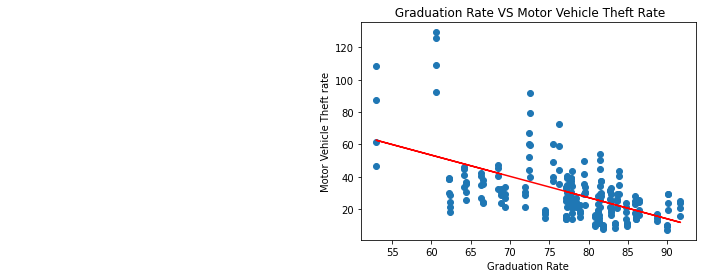

Correlation: -0.57


In [35]:
#Grad Rates vs Motor Vehicle Theft Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['motor_vehicle_theft rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Motor Vehicle Theft rate")
plt.title(" Graduation Rate VS Motor Vehicle Theft Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-2],2)))

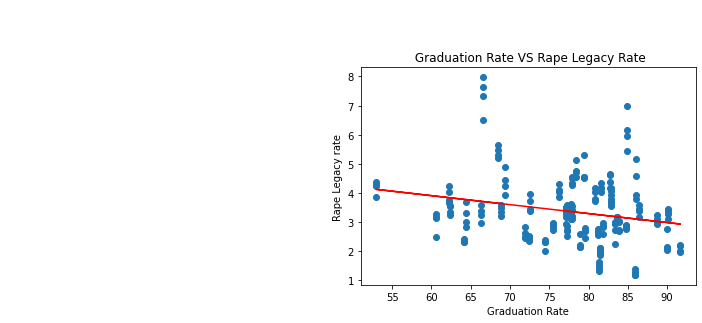

Correlation: -0.23


In [36]:
#Grad Rates vs Rape Legacy Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['rape_legacy rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Rape Legacy rate")
plt.title(" Graduation Rate VS Rape Legacy Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-1],2)))

In [37]:
#Find statistics on crime rates and put it in a df
stat_summary_crimerate = crimerates_allyears.describe()
stat_summary_crimerate

,crimerate_2006,crimerate_2007,crimerate_2008,crimerate_2009
count,51.000000,51.000000,51.000000,51.000000
mean,7.476347,7.313372,7.141929,6.786688
std,1.848196,1.868485,1.791580,1.644892
min,4.062569,3.957479,4.002517,3.977188
25%,5.782611,5.672644,5.685678,5.565327
50%,7.542100,7.194627,6.929869,6.521651
75%,8.880474,8.785611,8.494557,8.031326
max,12.324730,12.662759,13.084772,12.201642


In [38]:
#Search for stats in statistics df
outlier_crimerate_2006 = stat_summary_crimerate.loc["std","crimerate_2006"]*2
outlier_crimerate_2007 = stat_summary_crimerate.loc["std","crimerate_2007"]*2
outlier_crimerate_2008 = stat_summary_crimerate.loc["std","crimerate_2008"]*2
outlier_crimerate_2009 = stat_summary_crimerate.loc["std","crimerate_2009"]*2

In [39]:
#Search for stats in statistics df
mean_crimerate_2006 = stat_summary_crimerate.loc["mean","crimerate_2006"]
mean_crimerate_2007 = stat_summary_crimerate.loc["mean","crimerate_2007"]
mean_crimerate_2008 = stat_summary_crimerate.loc["mean","crimerate_2008"]
mean_crimerate_2009 = stat_summary_crimerate.loc["mean","crimerate_2009"]

In [40]:
# Show where 95% of the points fall under
print(f"2006 Crime rate Roughly 95% of the data is between {round(mean_crimerate_2006-outlier_crimerate_2006,3)} and {round(mean_crimerate_2006+outlier_crimerate_2006,3)}")
print(f"2007 Crime rate Roughly 95% of the data is between {round(mean_crimerate_2007-outlier_crimerate_2007,3)} and {round(mean_crimerate_2007+outlier_crimerate_2007,3)}")
print(f"2008 Crime rate Roughly 95% of the data is between {round(mean_crimerate_2008-outlier_crimerate_2008,3)} and {round(mean_crimerate_2008+outlier_crimerate_2008,3)}")
print(f"2009 Crime rate Roughly 95% of the data is between {round(mean_crimerate_2008-outlier_crimerate_2009,3)} and {round(mean_crimerate_2009+outlier_crimerate_2009,3)}")

2006 Crime rate Roughly 95% of the data is between 3.78 and 11.173
2007 Crime rate Roughly 95% of the data is between 3.576 and 11.05
2008 Crime rate Roughly 95% of the data is between 3.559 and 10.725
2009 Crime rate Roughly 95% of the data is between 3.852 and 10.076


In [41]:
# Create a df with all the outliers that don't fall in that 95% range
outlier_crime_states_2006 = crimerates_allyears.loc[(crimerates_allyears["crimerate_2006"]<= round(mean_crimerate_2006-outlier_crimerate_2006,3))
                                                   |(crimerates_allyears["crimerate_2007"]<= round(mean_crimerate_2007-outlier_crimerate_2007,3))
                                                   |(crimerates_allyears["crimerate_2008"]<= round(mean_crimerate_2008-outlier_crimerate_2008,3))
                                                   | (crimerates_allyears["crimerate_2009"]<= round(mean_crimerate_2009-outlier_crimerate_2009,3))
                                                   | (crimerates_allyears["crimerate_2006"]>= round(mean_crimerate_2006+outlier_crimerate_2006,3))
                                                   | (crimerates_allyears["crimerate_2007"]>= round(mean_crimerate_2007+outlier_crimerate_2007,3))
                                                   | (crimerates_allyears["crimerate_2008"]>= round(mean_crimerate_2008+outlier_crimerate_2008,3))
                                                   | (crimerates_allyears["crimerate_2009"]>= round(mean_crimerate_2009+outlier_crimerate_2009,3))]
outlier_crime_states_2006

,state,crimerate_2006,crimerate_2007,crimerate_2008,crimerate_2009
8,DC,12.32473,12.662759,13.084772,12.201642


In [42]:
#Find statistics on grad rates and put it in a df
grad_stat_summary = gradrates_allyears.describe()
grad_stat_summary

,gradrate_2006,gradrate_2007,gradrate_2008,gradrate_2009
count,51.000000,48.000000,48.000000,47.000000
mean,76.750412,76.794091,77.482878,73.475198
std,8.604973,10.500512,10.143287,10.115428
min,57.300000,27.400000,30.800000,39.000000
25%,70.994814,73.877610,74.431185,69.454687
50%,78.949606,78.903876,79.402796,73.431944
75%,82.627571,82.869463,83.892955,77.673750
max,91.648739,91.530380,92.274123,100.000000


In [43]:
#Put sd and possible outliers for all years

#2006
grad_2006_sd = grad_stat_summary.loc["std","gradrate_2006"]
outlr_grad_2006_sd = grad_2006_sd * 2
#2007
grad_2007_sd = grad_stat_summary.loc["std","gradrate_2007"]
outlr_grad_2007_sd = grad_2007_sd * 2
#2008
grad_2008_sd = grad_stat_summary.loc["std","gradrate_2008"]
outlr_grad_2008_sd = grad_2008_sd * 2
#2009
grad_2009_sd = grad_stat_summary.loc["std","gradrate_2009"]
outlr_grad_2009_sd = grad_2009_sd * 2

In [44]:
#Find the mean 
grad_2006_mean = grad_stat_summary.loc["mean","gradrate_2006"]
grad_2007_mean = grad_stat_summary.loc["mean","gradrate_2007"]
grad_2008_mean = grad_stat_summary.loc["mean","gradrate_2008"]
grad_2009_mean = grad_stat_summary.loc["mean","gradrate_2009"]

In [45]:
# Show where 95% of the points fall under
print(f"2006 graduation rate Roughly 95% of the data is between {round(grad_2006_mean-outlr_grad_2006_sd,3)} and {round(grad_2006_mean+outlr_grad_2006_sd,3)}")
print(f"2007 graduation rate Roughly 95% of the data is between {round(grad_2007_mean-outlr_grad_2006_sd,3)} and {round(grad_2007_mean+outlr_grad_2006_sd,3)}")
print(f"2008 graduation rate Roughly 95% of the data is between {round(grad_2008_mean-outlr_grad_2006_sd,3)} and {round(grad_2008_mean+outlr_grad_2006_sd,3)}")
print(f"2009 graduation rate Roughly 95% of the data is between {round(grad_2009_mean-outlr_grad_2006_sd,3)} and {round(grad_2009_mean+outlr_grad_2006_sd,3)}")

2006 graduation rate Roughly 95% of the data is between 59.54 and 93.96
2007 graduation rate Roughly 95% of the data is between 59.584 and 94.004
2008 graduation rate Roughly 95% of the data is between 60.273 and 94.693
2009 graduation rate Roughly 95% of the data is between 56.265 and 90.685


In [46]:
# Create a df with all the outliers that don't fall in that 95% range
outlier_grad_states = crimerates_allyears.loc[(crimerates_allyears["crimerate_2006"]<= round(mean_crimerate_2006-outlier_crimerate_2006,3))
                                                   |(crimerates_allyears["crimerate_2007"]<= round(mean_crimerate_2007-outlier_crimerate_2007,3))
                                                   |(crimerates_allyears["crimerate_2008"]<= round(mean_crimerate_2008-outlier_crimerate_2008,3))
                                                   | (crimerates_allyears["crimerate_2009"]<= round(mean_crimerate_2009-outlier_crimerate_2009,3))
                                                   | (crimerates_allyears["crimerate_2006"]>= round(mean_crimerate_2006+outlier_crimerate_2006,3))
                                                   | (crimerates_allyears["crimerate_2007"]>= round(mean_crimerate_2007+outlier_crimerate_2007,3))
                                                   | (crimerates_allyears["crimerate_2008"]>= round(mean_crimerate_2008+outlier_crimerate_2008,3))
                                                   | (crimerates_allyears["crimerate_2009"]>= round(mean_crimerate_2009+outlier_crimerate_2009,3))]
outlier_grad_states

,state,crimerate_2006,crimerate_2007,crimerate_2008,crimerate_2009
8,DC,12.32473,12.662759,13.084772,12.201642


In [47]:
#Find the mean of all years per state and put it in a df
mean_gradrates_allyears = gradrates_allyears["gradrate_2006"] + gradrates_allyears["gradrate_2007"] + \
gradrates_allyears["gradrate_2008"] + gradrates_allyears["gradrate_2009"]
mean_gradrates_allyears = mean_gradrates_allyears/4


In [48]:
#Add states to the crime df
crimerates_allyears_mean = crimerates_allyears["crimerate_2006"] + crimerates_allyears["crimerate_2007"] + \
crimerates_allyears["crimerate_2008"] + crimerates_allyears["crimerate_2009"]

combined_mean_crime_with_state = pd.DataFrame({
    "state":crimerates_allyears["state"],
    "Mean_crime_Years": crimerates_allyears_mean
    
})

In [49]:
#Add states to the grad df
combined_mean_grad_with_state = pd.DataFrame({
    "state": gradrates_allyears["state"],
    "Mean_grad_rate" : mean_gradrates_allyears
})



In [50]:
#Merge the two df
merge_crime_Grad = pd.merge(combined_mean_crime_with_state, combined_mean_grad_with_state, how="outer", on="state")
merge_crime_Grad = merge_crime_Grad.dropna(how = "any")


The correlation between both factors is nan


<ipython-input-51-015a2ed91659>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


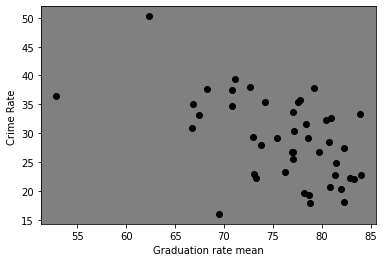

In [51]:
import scipy.stats as st

grad = merge_crime_Grad.iloc[:,2]
crime = merge_crime_Grad.iloc[:,1]
correlation = st.pearsonr(grad,crime)
image =  plt.scatter(grad,crime, )
image.set_facecolor("xkcd:black")
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")

plt.xlabel('Graduation rate mean')
plt.ylabel('Crime Rate ')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [52]:
crimerate_summary_table = pd.DataFrame({
    "Motor_vehicle_theft_2006" : crime_rates_2006["motor_vehicle_theft"],
    "Motor_vehicle_theft_2007" : crime_rates_2007["motor_vehicle_theft"],
    "Motor_vehicle_theft_2008" : crime_rates_2008["motor_vehicle_theft"],
    "Motor_vehicle_theft_2009" : crime_rates_2009["motor_vehicle_theft"]
})
crimerate_summary_table

,Motor_vehicle_theft_2006,Motor_vehicle_theft_2007,Motor_vehicle_theft_2008,Motor_vehicle_theft_2009
0,15018,14238,13466,11091
1,2536,2433,1628,1687
2,56650,50244,38587,26437
3,7515,6999,6543,6097
4,243655,220134,192529,163833
5,20656,16656,13349,12480
6,10290,9951,8891,7461
7,2884,2342,2557,1906
8,7321,7606,6465,5532
9,76454,73630,63515,50259
